Firstly, I downloaded the dataset, it has 9000+ images of different sizes and 101 different classes. I used cv2 which is opencv library for loading images from folders and storing them as arrays.
As all images had different sizes, firstly we needed to resize all images to a uniform size, as PCA is used for dimension reduction, but the all data samples must have same dimensionality for it. So, I choosed the size of 100 by 100. As most of the images has at least 100 pixels for each side. For example, there are images with sizes 360x111 and images with size 120x260. So, all images should have at least 100 pixels on each side. Also, bigger number of pixels leads to more complex computation, thus, leads to longer period of waiting for computations. So I choosed this optimal value of 100 x 100. The next step is to flatten this 100 by 100 array to a 100*100 = 10000x1 array.
100x100 pixels is 10000 pixels in total, each pixel is a variable. So in total we have 10000 variables.

In [19]:
import os
import cv2
import numpy as np

# Here is the function for loading images from differernt folders using cv2 library, also we resize the images to 100 by 100
def load_images(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized)
    return images

# Here is the function where we flatten the pixels and store them as numpy arrays for easier calculation of PCA
def prepare_dataset(root_folder, target_size=(100, 100)):
    data = []
    labels = []
    classes = os.listdir(root_folder) # here different classes are just different folder names, actually we don't need for PCA, but it would be needed if we then wanted to train a classifier.

    for i, class_name in enumerate(classes):
        class_path = os.path.join(root_folder, class_name)
        images = load_images(class_path, target_size)
        labels.extend([i] * len(images))
        data.extend(images)

    return np.array(data), np.array(labels)

# Tasks 1-6

Here as a standartization I used sklearn's StandardScaler function which substracts a mean an divides to the standard deviation each variable. Which is exactly as the formula in the pdf.

Then, I used sklearn's PCA for PCA calculation.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def pca_calculation(data, n_components):
    # Flattening the images by reshaping
    data_flat = data.reshape(data.shape[0], -1)

    # Standardizing all features.
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data_flat)

    #PCA calculations, n_components is the function parameter, so we could use this function with different number of components
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data_standardized)

    return data_pca, pca

# Task 7

Here is the code for visualizations. it takes a pca object from our function. This pca object has a method expalined_varience_ratio which is exactly the total varience to retain ratio.

In [ ]:
import matplotlib.pyplot as plt
def visualize_explained_variance(pca):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance vs. Number of Principal Components')
    plt.show()

In [20]:
root_folder = "/content/drive/MyDrive/project3/101_ObjectCategories"
data, labels = prepare_dataset(root_folder)

In [21]:
n_components = 1000

From the below graph we see that n = 1000 components is enough for more than 90% of total varience in the dataset. So 1/10 of components is enough for more than 90% of the total varience in the dataset. However, we see that the explained varience or total varience to retain increases very slowly after number of components more than 100. So, the hidden dimension of the dataset is somewhere around 100.

By decreasing the dimension of the data to 10 times, so making it 10 times less complex we could retian more than 90% of the total varience

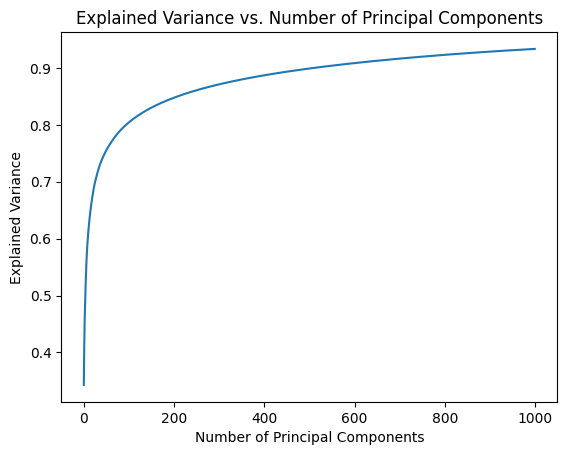

In [22]:
data_pca, pca_model = pca_calculation(data, n_components)

visualize_explained_variance(pca_model)

So, I visualized only 100 components, and wee that indeed 100 components is enough for 80% of total varience, meaning that other 900 components bring us slightly more than 10% of the variance. Also, in this grapgh either we see that at around number of components = 30 we already have a 70% of total varience to retain. So, additional 70 components bring us only 10% of varience. So the hidden dimension of the data is somewhere around 30. Because, after 30 components adding more components contributes less to the total variance.

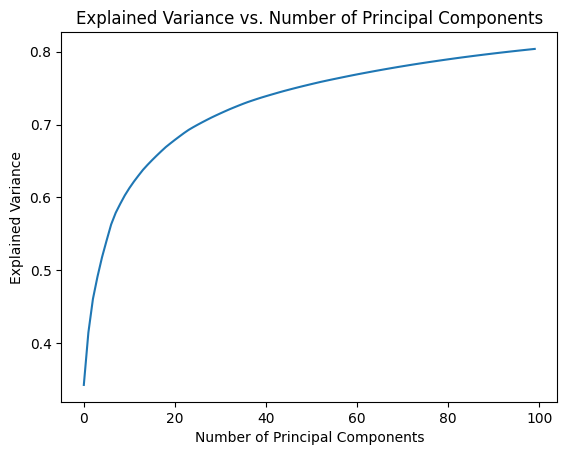

In [25]:
data_pca, pca_model = pca_calculation(data, n_components = 100)

# Visualize explained variance
visualize_explained_variance(pca_model)

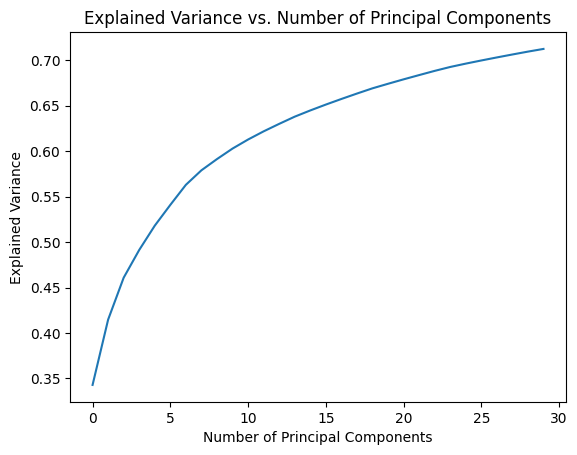

In [28]:
data_pca, pca_model = pca_calculation(data, n_components = 30)

# Visualize explained variance
visualize_explained_variance(pca_model)

In the above graph the slope is almost uniform. 30 components is enough for 70% of total varience.  However up to 10 components slope is higher than after, meaning that up to 10 components we got more varience that for each component than after


Overall, if we need 90% of total varience to retain, we need 1000 components, which is 10 times less than original dimension of the data. If 80% of total varience is enough then 100 components would be good choice, as it is 100 times less than original dimesion of the data. However, if we need as less of dimensionality as we could but getting as much total varience of retain we could, the best choice would be 10, because after 10 components the adding more components contributes slightly less to the total varience to retain. So, the hidden dimension of the data is 10 or maybe 100, as after 100 the varience that we get from adding additional components really diminishes.